### Laboratorium 4 - zadania

Jeśli nie posiadasz jeszcze pakietu `skimage`, zainstaluj go poniższym poleceniem:

In [36]:
# !pip install scikit-image

In [37]:
import os

import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.segmentation import mark_boundaries, slic

data_directory = '../Data'

#### Zadanie 1

Dane są obrazy `hare` i `pills`. Wykonaj dla nich segmentację przy użyciu algorytmu SLIC. Celem jest uzyskanie jednolitych  superpikseli, a więc zawierających tylko fragmenty obiektów lub tylko tła (a nie jednego i drugiego naraz). Przeanalizuj zachowanie algorytmu dla różnej liczby superpikseli i parametru sigma.

Zwróć uwagę, że wynikiem działania scikitowej implementacji SLIC (podobnie jak wielu innych algorytmów klasyfikacyjnych) jest obraz typu `np.int64` przyporządkowujący każdemu pikselowi obrazu wejściowego indeks superpiksela. Takiej reprezentacji oczekuje też funkcja `mark_boundaries`.

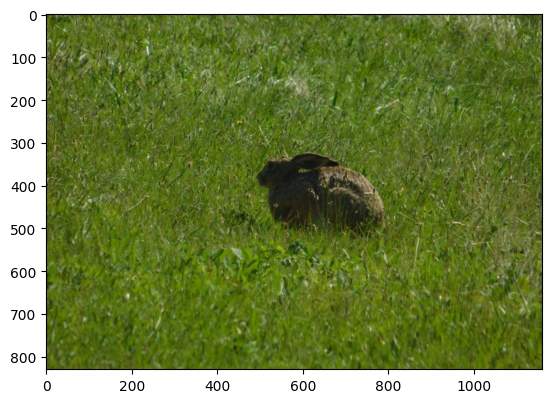

In [38]:
hare = cv2.imread(f'{data_directory}/Zajac_kolor.jpg')[..., ::-1]
plt.imshow(hare);

In [71]:
import cv2
from PIL import Image
from skimage.segmentation import slic, mark_boundaries
from skimage.util import img_as_float
import matplotlib.pyplot as plt

def segment_image(image, sigma=5, n_segments=100, color=(1, 1, 0)):
  image = img_as_float(image)
  segments = slic(image, n_segments=n_segments, sigma=sigma, start_label=1)
  img_tmp = mark_boundaries(image, segments, color=color)
  
  return img_tmp

In [72]:
def do_segmentation(img):
    sigmas = (0.1, 0.5, 1.0, 2.0, 5.0)
    n_segments_list = (50, 100, 200, 500)

    fig, ax = plt.subplots(len(sigmas), len(n_segments_list), figsize=(20, 20))

    for i, sigma in enumerate(sigmas):
        for j, n_segments in enumerate(n_segments_list):
            segmented_img = segment_image(img, sigma, n_segments)
            ax[i][j].imshow(segmented_img) 
            plt.axis('off')
            ax[i][j].set_title(f'sigma: {sigma}. n_segments: {n_segments}')

    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

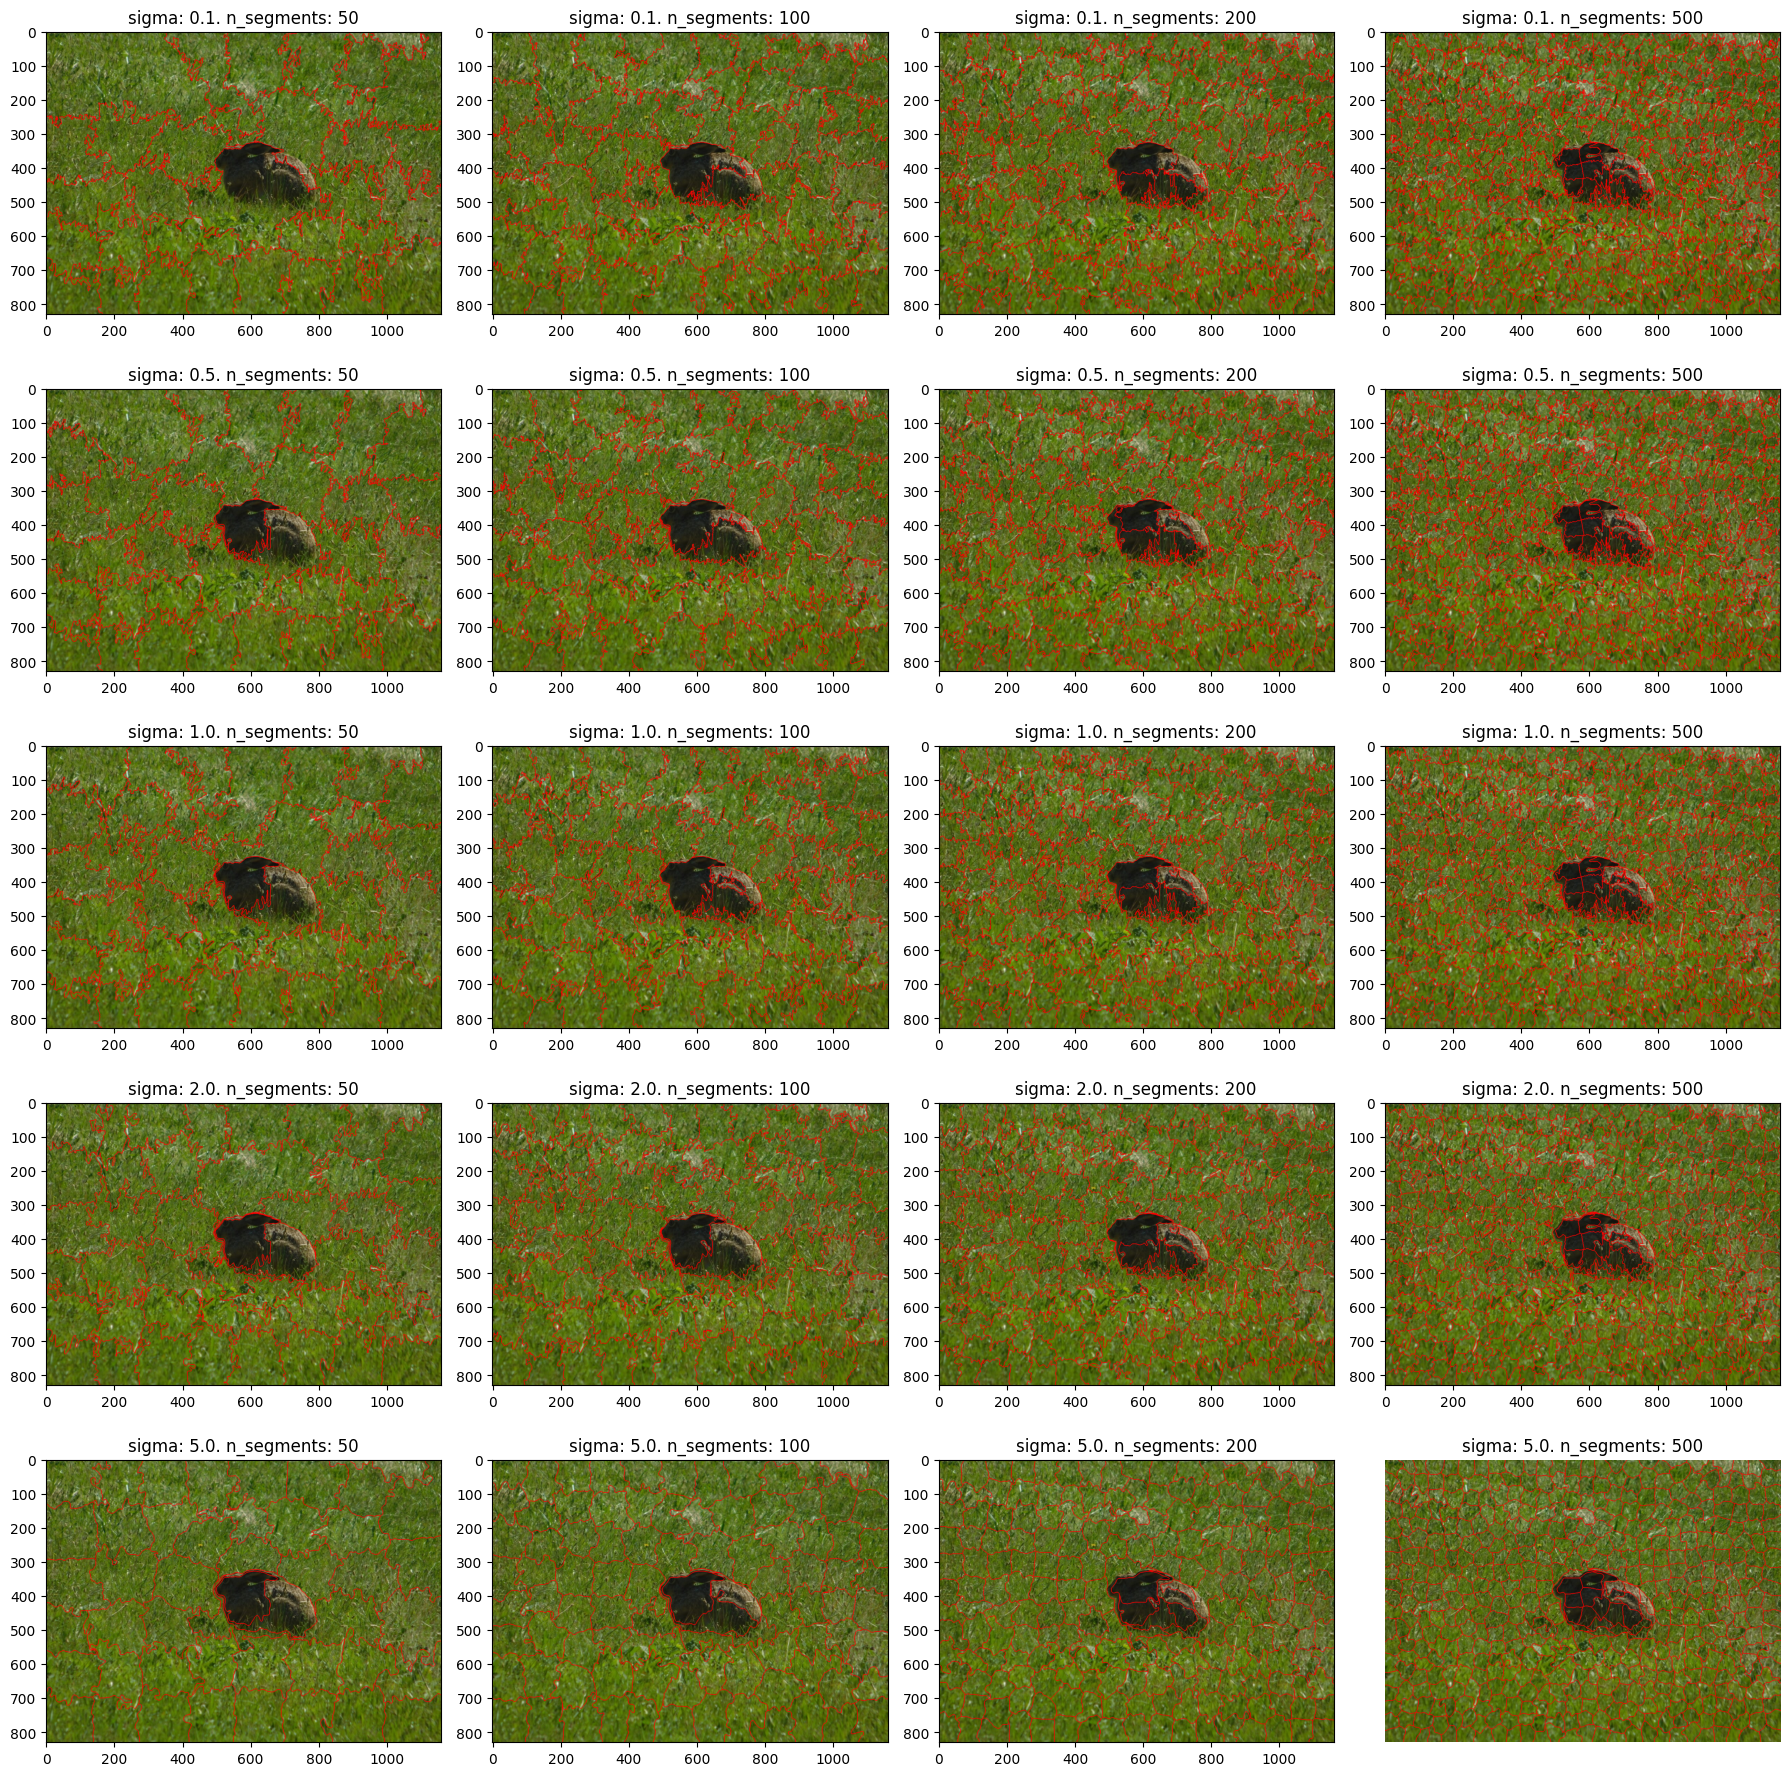

In [73]:
do_segmentation(hare)

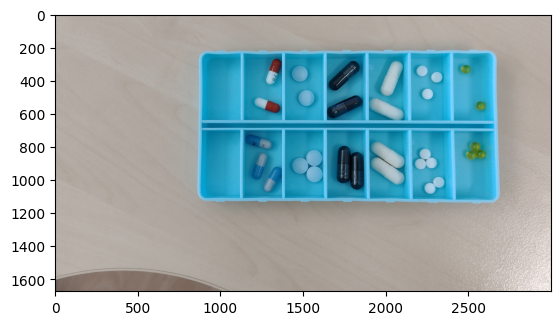

In [74]:
pills = cv2.imread(f'{data_directory}/pills.png')[..., ::-1]
plt.imshow(pills);

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

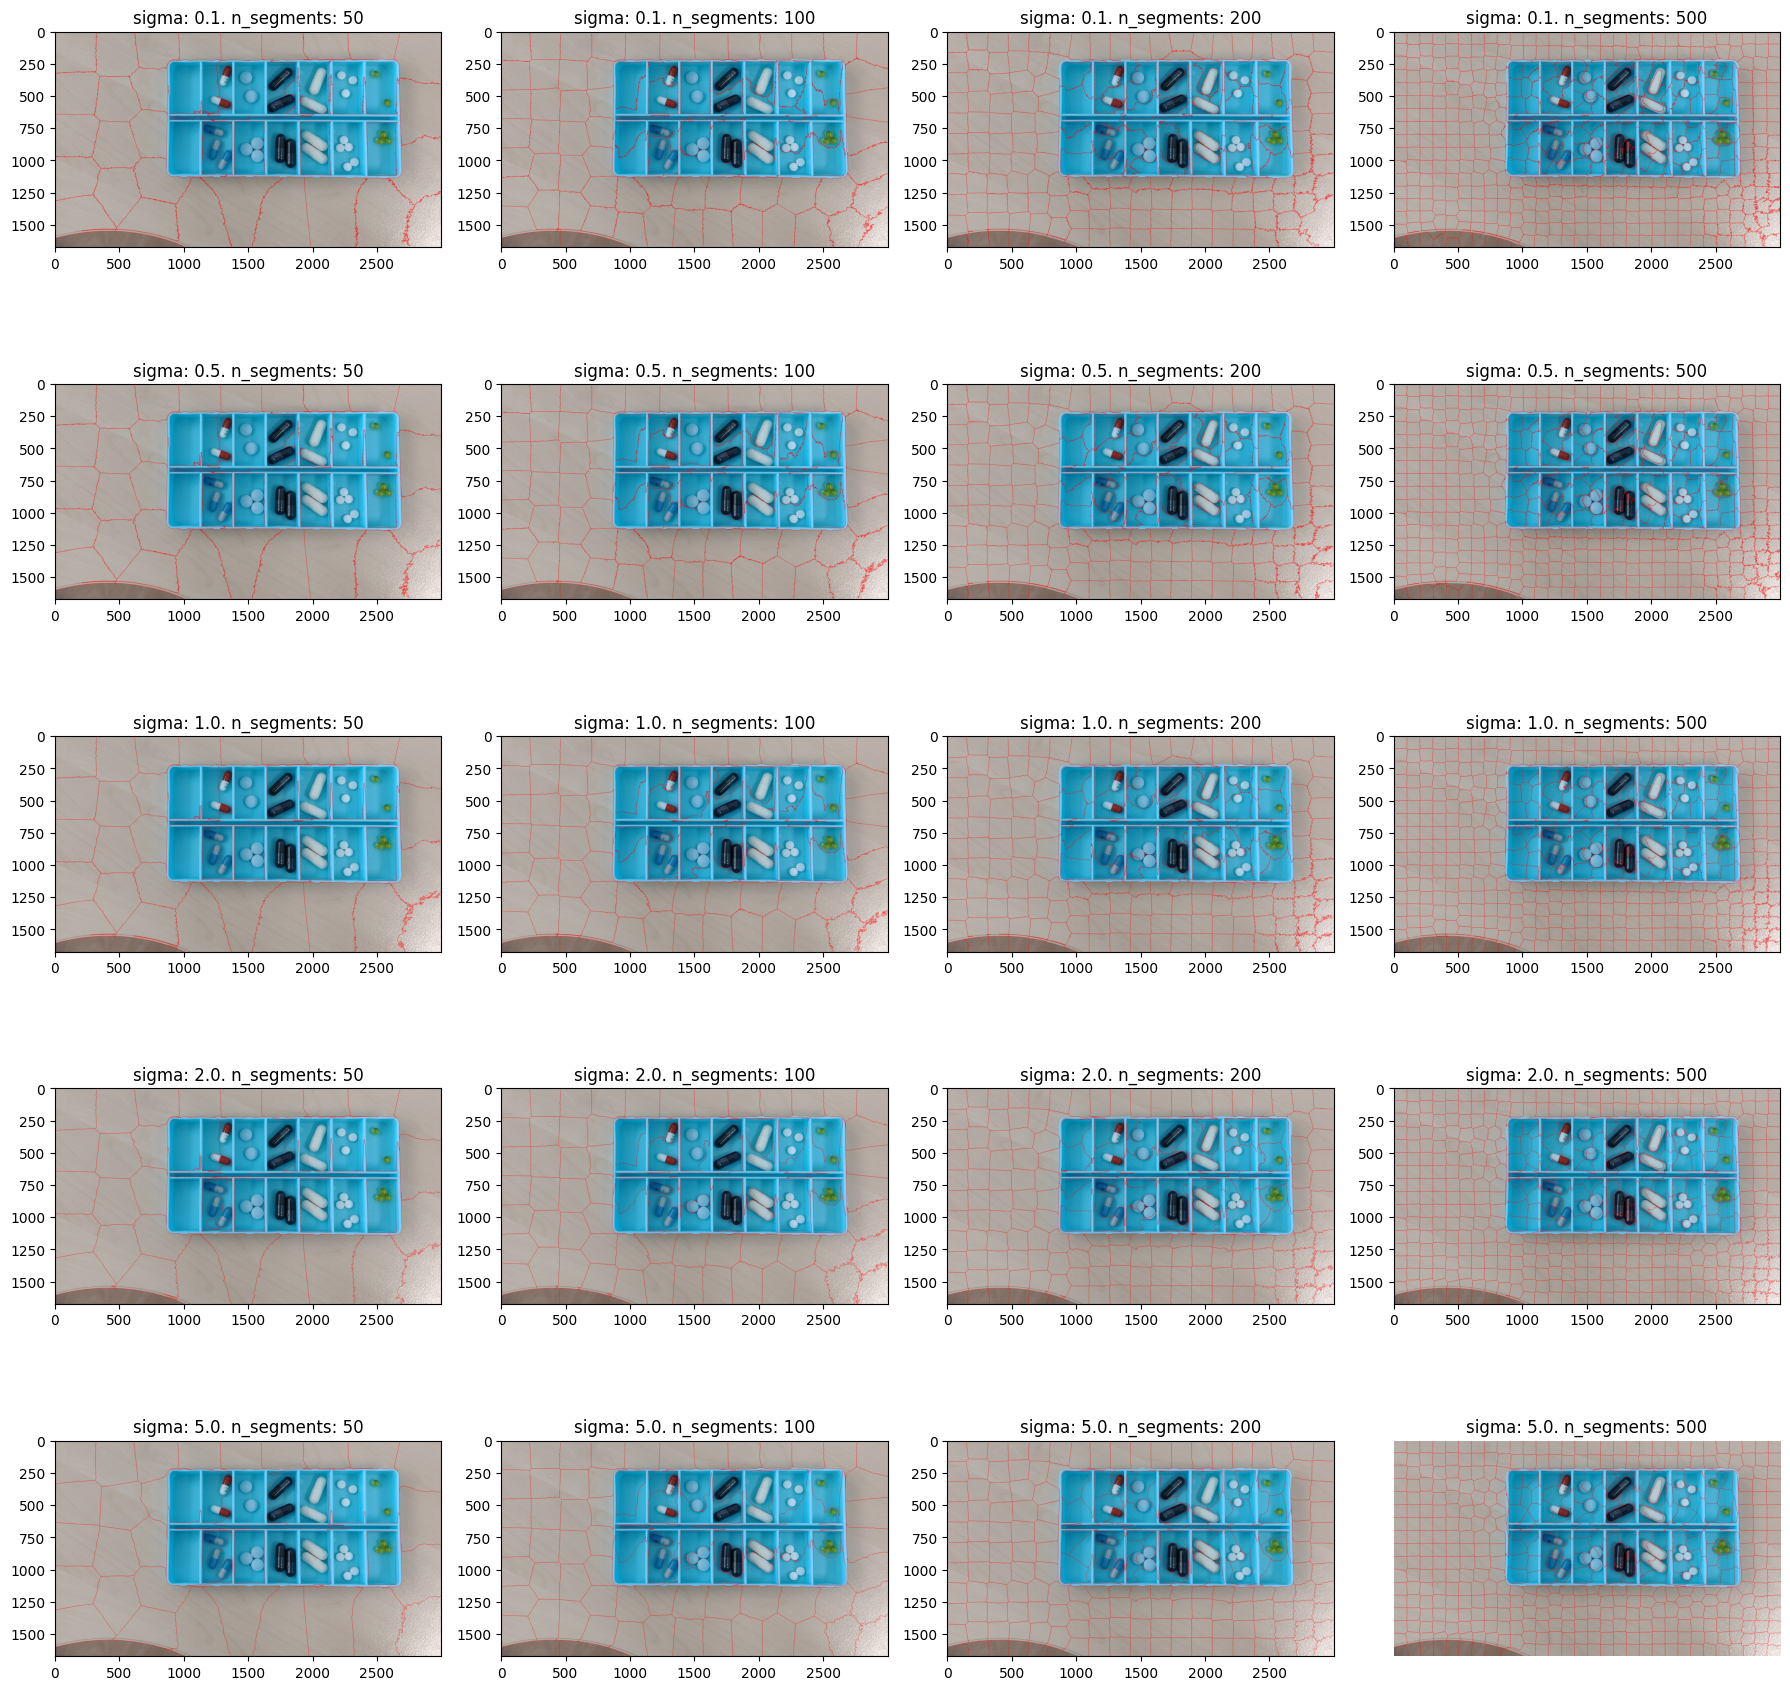

In [75]:
do_segmentation(pills, color=(255, 0, 0))

#### Zadanie 2

Dla obrazu `hare` wykonaj post-processing segmentacji SLIC by uzyskać dwa jednorodne obszary: jeden zawierający wyłącznie zająca, drugi zawierający wyłącznie trawę. Wykorzystaj dowolny algorytm klasteryzacji (np. `cv2.kmeans`) używając *cech* superpikseli uzyskanych w zadaniu 1 jako danych wejściowych. Najprostszymi cechami, którymi można opisać superpiksele, są np. średnie wartości składowych barwy (pikseli, z których składa się superpiksel) - od nich zacznij. Zawsze możesz rozszerzyć rozwiązanie o bardziej wyrafinowane pomysły, jeśli starczy czasu.

Zaprezentuj wyniki najlepiej za pomocą `mark_boundaries` albo po prostu wyświetlając maskę binarną.

---

NumPy pro-tip: aby uzyskać zbiór wszystkich pikseli obrazu o wartości np. 3 możesz użyć notacji: ```obraz==3```. Wynikiem jest macierz boolowska, której można używać jako selektor. Np. aby na obrazie `A` wyzerować wszystkie piksele, którym w obrazie `B` odpowiada wartość 5, możesz napisać: ```A[B==5] = 0```. Ten zapis jest **znacznie** szybszy niż manualne iterowanie po obrazach i sprawdzanie warunków if-ami.

Przykładowe użycie `cv2.kmeans` (więcej możesz poczytać np. [tutaj](https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_ml/py_kmeans/py_kmeans_opencv/py_kmeans_opencv.html)):
```python
c, labels, centers = cv2.kmeans(
    data=data,  # np.ndarray typu float o wymiarach NxK gdzie N to liczba sampli (u nas: superpikseli), K - liczba cech
    K=2,        # oczekiwana liczba klastrów
    bestLabels=None,
    criteria=(cv2.TERM_CRITERIA_EPS, 10, 1.0),  # przykładowe kryteria stopu
    attempts=1, # liczba powtórzeń algorytmu
    flags=cv2.KMEANS_RANDOM_CENTERS  # sposób inicjalizacji klastrów
)
```

Funkcja ta zwraca krotkę, której najważniejszym komponentem jest ten drugi (tu: `labels`), tj. macierz o wymiarach Nx1, zawierająca indeks klastra przypisanego i-temu samplowi.

In [79]:
def get_slic(image, sigma, n_segments):
  image = img_as_float(image)
  segments = slic(image, n_segments=n_segments, sigma=sigma, start_label=1)
  return segments

def get_data(image, segments):
  superpixels_values = np.unique(segments)
  data = np.zeros(shape=(len(superpixels_values), 5))
  for index, color in enumerate(superpixels_values):
      mask = (segments == color)
      data[index,:3] = image[mask].mean(axis=0)/255
      
      #data[index, 3] = ((np.argmax(mask.astype(int), axis=0)[0] + np.argmin(mask.astype(int), axis=0)[0])//2 )/mask.shape[0]
      #data[index, 4] = ((np.argmax(mask.astype(int), axis=1)[0] + np.argmin(mask.astype(int), axis=1)[0])//2 )/mask.shape[1]

    # x = np.where(data % 2)
    # np.array(list(zip(*x))).mean(axis=0)
  data = data.astype(np.float32)
  return data

# zacznij od przygotowania macierzy wejściowej (data) reprezentującej superpiksele jako punkty danych

Możesz wykorzystać poniższy snippet by zredukować wynik segmentacji SLIC (`segments`) w oparciu o klasteryzację k-średnich (`labels`):

In [80]:
def get_superpixels_labels(superpixels):
    c, labels, centers = cv2.kmeans(
        data=superpixels,  # np.ndarray typu float o wymiarach NxK gdzie N to liczba sampli (u nas: superpikseli), K - liczba cech
        K=2,        # oczekiwana liczba klastrów
        bestLabels=None,
        criteria=(cv2.TERM_CRITERIA_EPS, 10, 1.0),  # przykładowe kryteria stopu
        attempts=10, # liczba powtórzeń algorytmu
        flags=cv2.KMEANS_RANDOM_CENTERS  # sposób inicjalizacji klastrów
    )

    return labels

In [81]:
def get_poprocessed_segments(segments, labels):
    postprocessed = np.zeros_like(segments)
    for i in range(labels.shape[0]):
        postprocessed[segments==i+1] = labels[i] # jeśli używamy indeksowania od 1

    return postprocessed

In [82]:
def get_segmentated_image(img, sigma, n_segments, mark=False):
    segments = get_slic(img, sigma, n_segments)
    data = get_data(img, segments)

    labels = get_superpixels_labels(data)
    segmantated_image = get_poprocessed_segments(segments, labels)

    if mark:
        return mark_boundaries(img, segmantated_image)
    else:
        return segmantated_image

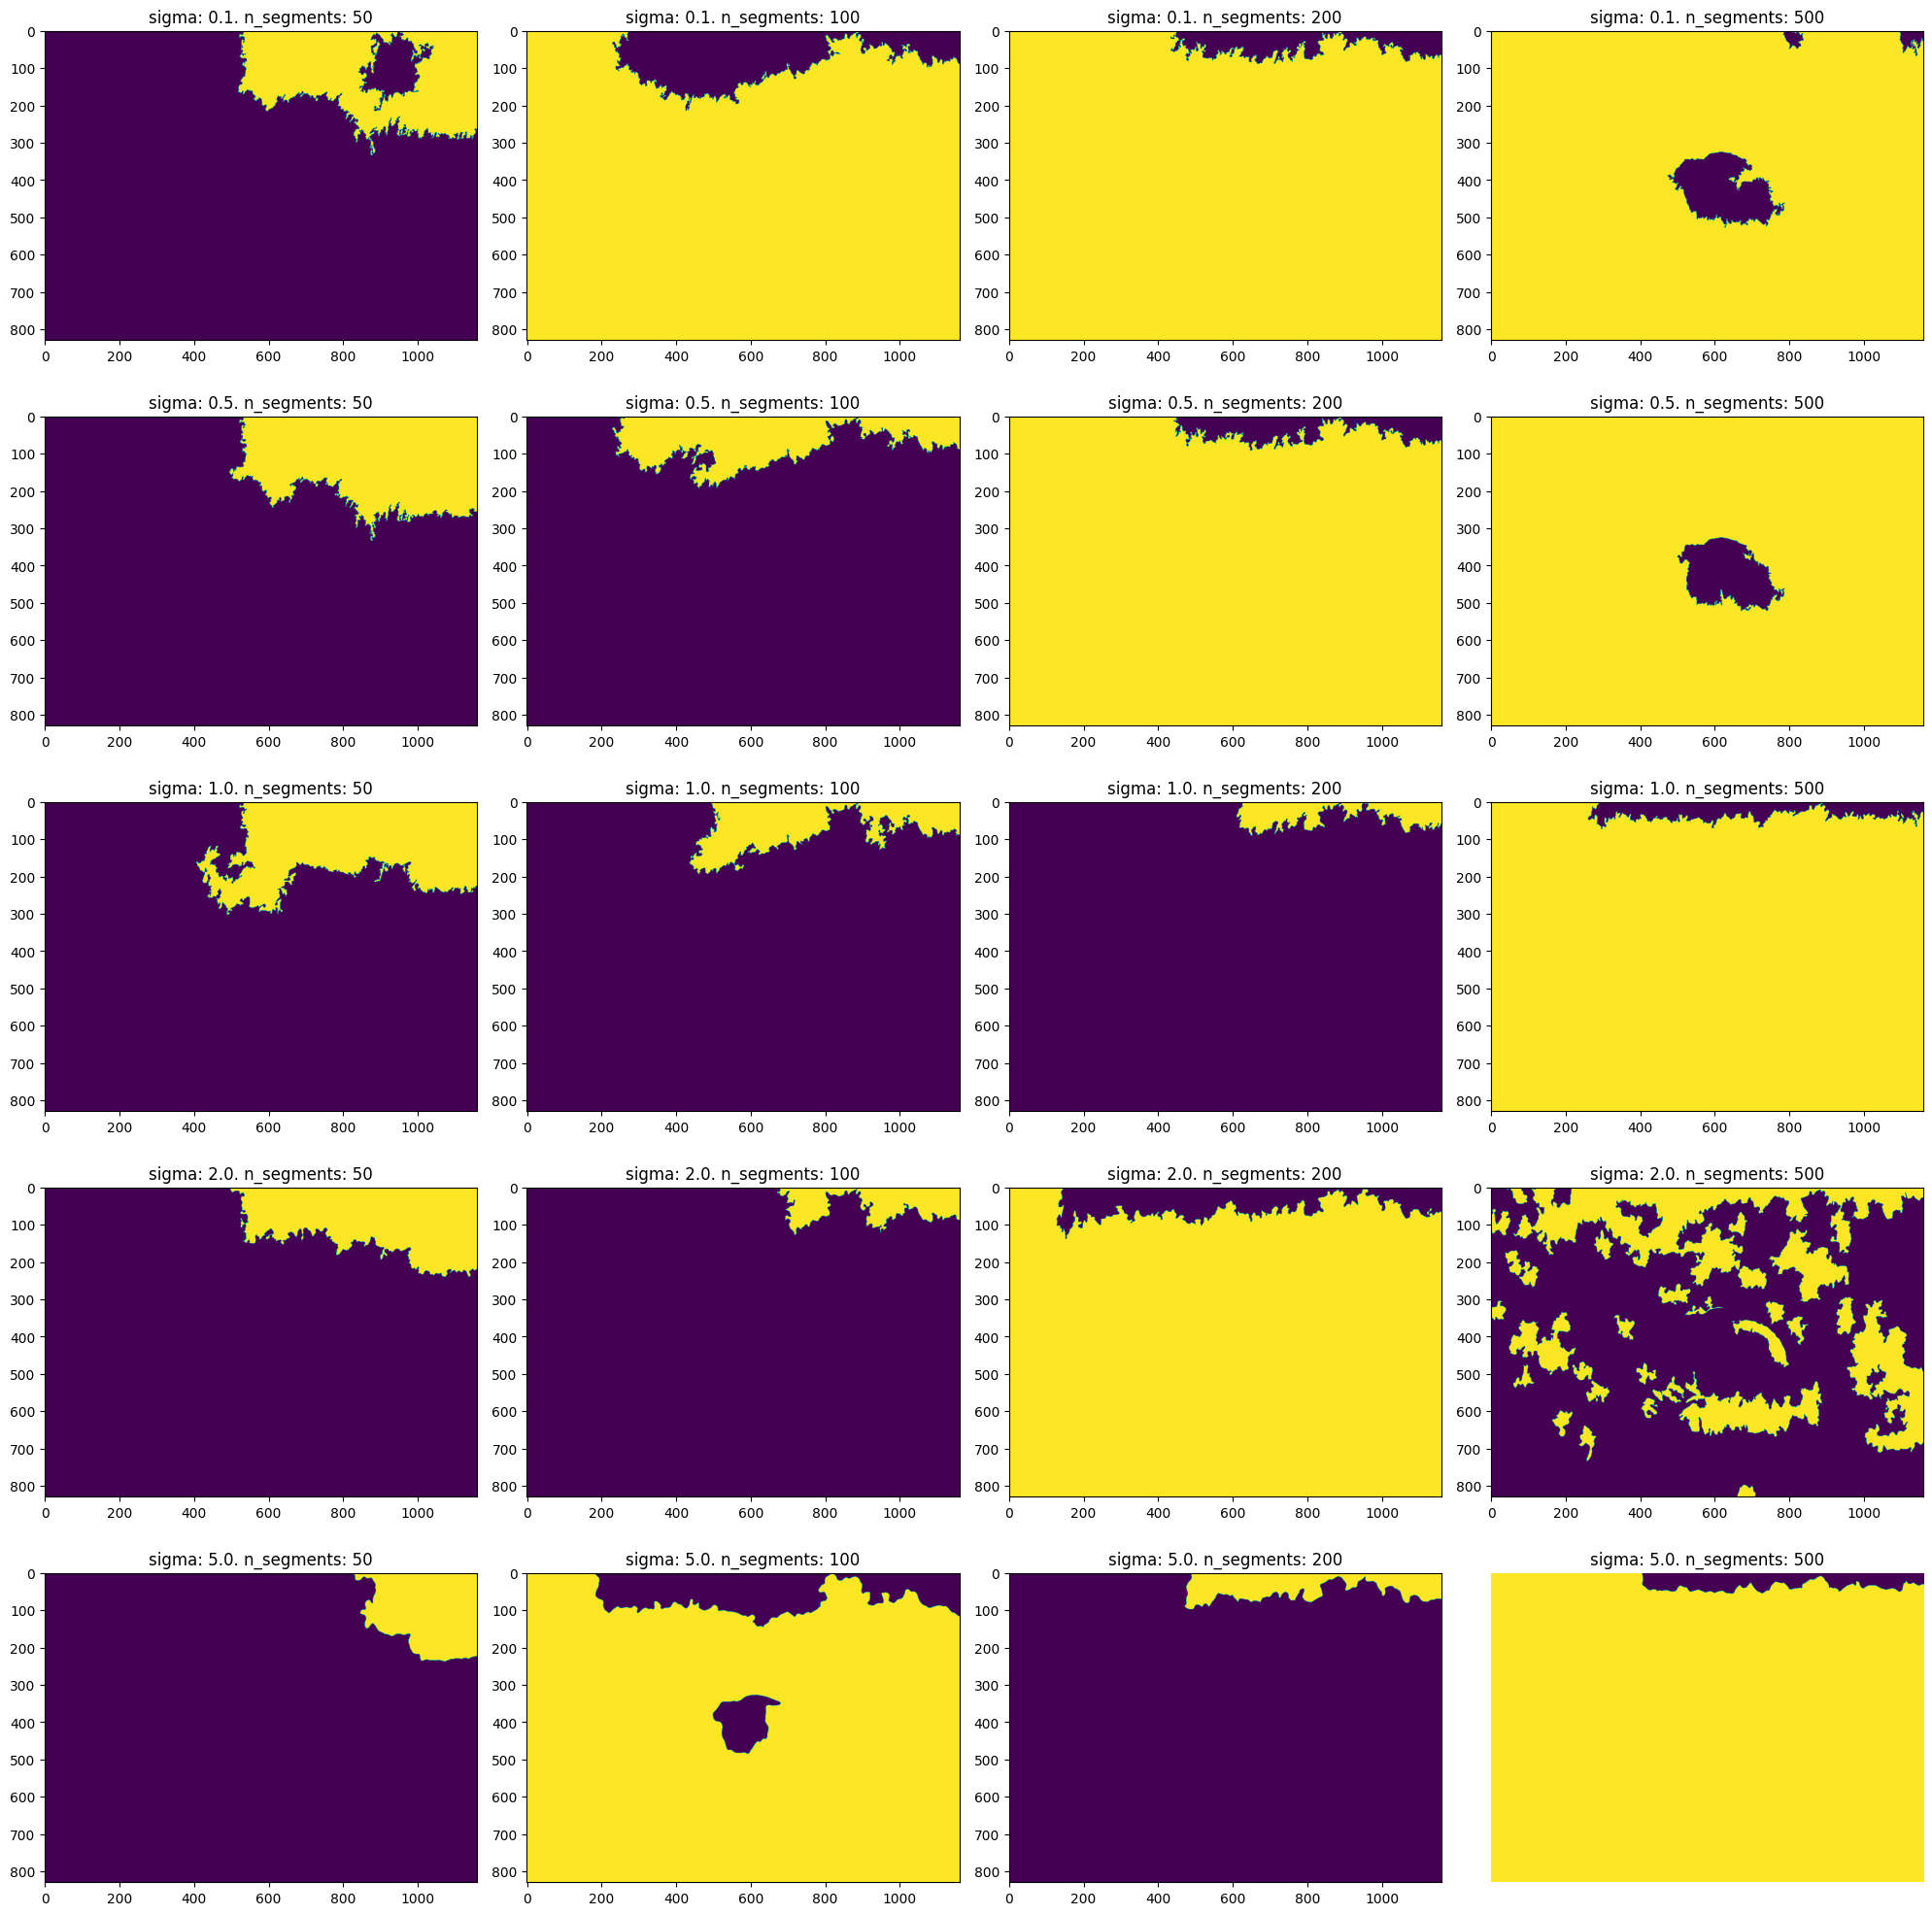

In [83]:
sigmas = (0.1, 0.5, 1.0, 2.0, 5.0)
n_segments_list = (50, 100, 200, 500)

fig, ax = plt.subplots(len(sigmas), len(n_segments_list), figsize=(20, 20))

for i, sigma in enumerate(sigmas):
    for j, n_segments in enumerate(n_segments_list):
        segmented_img = get_segmentated_image(hare, sigma, n_segments, mark=True)
        ax[i][j].imshow(segmented_img)#, cmap='gray') 
        plt.axis('off')
        ax[i][j].set_title(f'sigma: {sigma}. n_segments: {n_segments}')

plt.tight_layout()
plt.show()

In [84]:
# #data = np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12]])
# mask = np.array([[0,0,0,1],[0,0,1,1],[0,1,0,0]])
# print(mask)
# x = np.where(mask % 2)
# np.array(list(zip(*x))).mean(axis=0)